# Data Description:
The data contains features extracted from the silhouette of vehicles in different
angles. Four "Corgie" model vehicles were used for the experiment: a double
decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This
particular combination of vehicles was chosen with the expectation that the bus,
van and either one of the cars would be readily distinguishable, but it would be
more difficult to distinguish between the cars.
## Domain:
Object recognition
## Context:
The purpose is to classify a given silhouette as one of three types of vehicle,
using a set of features extracted from the silhouette. The vehicle may be viewed
from one of many different angles.
## Attribute Information:
● All the features are geometric features extracted from the silhouette.
● All are numeric in nature.
## Learning Outcomes:
● Exploratory Data Analysis
● Reduce number dimensions in the dataset with minimal information loss
● Train a model using Principal Components
## Objective:
Apply dimensionality reduction technique – PCA and train a model using
principal components instead of training the model using raw data.

#### Import libraries and Read the dataset using function .dropna() - to avoid dealing with NAs

In [26]:
# Numerical libraries
import numpy as np

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns


vehicle_df = pd.read_csv('vehicle.csv').dropna()

In [25]:
vehicle_df.shape

(813, 19)

In [4]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [5]:
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


#### Print/ Plot the dependent (categorical variable) and Check for any missing values in the data

In [6]:
#Since the variable is categorical, you can use value_counts function
pd.value_counts(vehicle_df['class'])

car    413
bus    205
van    195
Name: class, dtype: int64

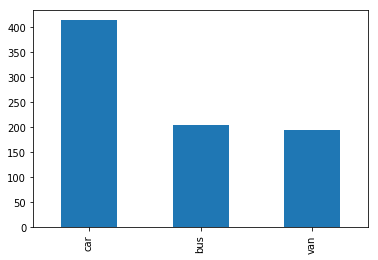

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(vehicle_df["class"]).plot(kind="bar")

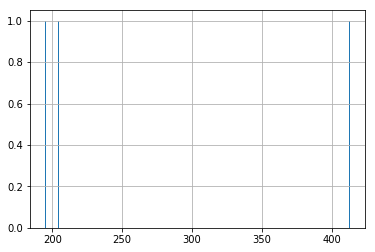

In [8]:
pd.value_counts(vehicle_df['class']).hist(bins=300)

In [9]:
vehicle_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

#### Standardize the data

In [10]:
# Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we 
#go for any clustering methods. You can use zscore function to do this

In [11]:
interest_df = vehicle_df.drop('class', axis=1)

In [12]:
from scipy.stats import zscore
interest_df_z = interest_df.apply(zscore)

In [13]:
interest_df_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


In [14]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = sc.fit_transform(interest_df) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
X_std[:2]

array([[ 0.16323063,  0.52040788,  0.06066872,  0.26497017,  1.2832543 ,
         0.2997208 , -0.19851729,  0.12964799, -0.21715097,  0.76631152,
        -0.39739727, -0.33901388,  0.30167634, -0.32119222, -0.07152328,
         0.37128716, -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, -0.83639333, -0.59925336,
         0.08578488, -0.59171992,  0.51433345, -0.60601383, -0.33746218,
        -0.59003405, -0.61875406, -0.50297155, -0.0535046 ,  0.53842522,
         0.14710858,  0.00340009,  0.44231829]])

#### Create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end
(Use hierarchial clustering)

np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

#Combine all three arrays a,b,c into a dataframe

X = np.concatenate((a, b, c), axis=0)
print(X.shape)  # 250 samples with 2 dimensions

####  Use scatter matrix to print all the 3 distributions

plt.scatter(X[:,0], X[:,1])
plt.show()

####  Find out the linkage matrix

In [ ]:
#Use ward as linkage metric and distance as Eucledian

In [16]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_std, 'ward', metric='euclidean')
Z.shape

(812, 4)

In [17]:
Z[:]

array([[1.27000000e+02, 3.70000000e+02, 1.31740844e-01, 2.00000000e+00],
       [4.78000000e+02, 7.52000000e+02, 3.94147914e-01, 2.00000000e+00],
       [4.48000000e+02, 5.25000000e+02, 5.40896298e-01, 2.00000000e+00],
       ...,
       [1.60100000e+03, 1.62100000e+03, 5.12738877e+01, 2.82000000e+02],
       [1.61700000e+03, 1.62000000e+03, 5.35328071e+01, 5.31000000e+02],
       [1.62200000e+03, 1.62300000e+03, 1.07910132e+02, 8.13000000e+02]])

####  Plot the dendrogram for the consolidated dataframe

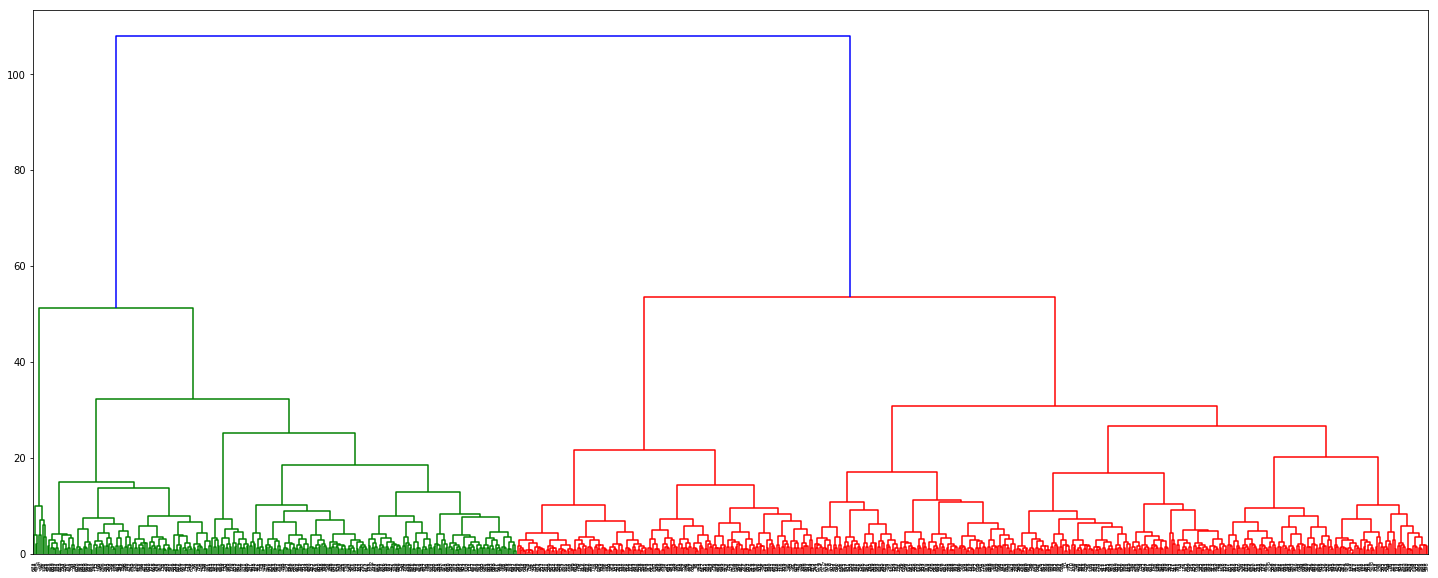

In [18]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

Recreate the dendrogram for last 12 merged clusters

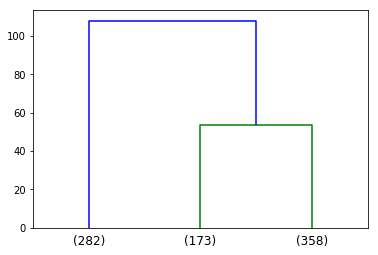

In [19]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

####  From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [20]:
max_d = 50

####  Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [21]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([4, 4, 2, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 2, 2, 4, 3, 4, 4, 2,
       4, 3, 2, 2, 3, 4, 4, 4, 2, 4, 3, 1, 2, 3, 2, 3, 4, 4, 2, 4, 4, 3,
       4, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 3, 3, 3, 2, 3, 2, 4, 2, 2,
       4, 3, 4, 2, 4, 3, 4, 2, 4, 3, 4, 2, 4, 3, 2, 3, 2, 4, 2, 4, 3, 2,
       3, 3, 2, 3, 1, 4, 4, 4, 2, 2, 4, 3, 2, 4, 4, 3, 3, 4, 4, 2, 2, 4,
       3, 4, 4, 4, 4, 4, 3, 4, 4, 2, 2, 4, 4, 3, 2, 1, 4, 4, 3, 4, 4, 2,
       3, 4, 2, 4, 4, 4, 4, 2, 2, 4, 2, 4, 2, 4, 4, 4, 3, 2, 4, 4, 2, 2,
       4, 2, 3, 3, 2, 2, 4, 2, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 2, 4, 4, 2,
       4, 4, 4, 2, 4, 3, 2, 3, 3, 3, 4, 4, 2, 2, 4, 4, 4, 3, 2, 4, 4, 4,
       2, 4, 3, 2, 4, 4, 2, 4, 3, 3, 4, 2, 4, 2, 3, 3, 3, 3, 2, 4, 4, 4,
       2, 3, 4, 4, 3, 2, 4, 3, 4, 4, 2, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 3,
       4, 4, 4, 2, 3, 4, 4, 3, 3, 2, 4, 2, 4, 3, 3, 2, 4, 2, 3, 3, 2, 4,
       4, 2, 3, 4, 1, 4, 4, 2, 4, 2, 3, 4, 4, 2, 4, 4, 4, 3, 4, 2, 2, 2,
       4, 4, 4, 2, 3, 3, 4, 2, 3, 2, 2, 3, 2, 4, 3,

####  Use matplotlib to visually observe the clusters in 2D space

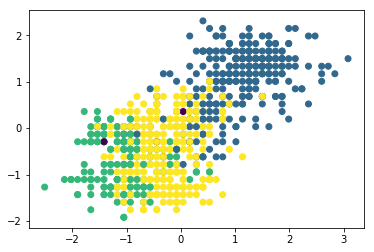

In [23]:
#### plt.figure(figsize=(10, 8))
plt.scatter(X_std[:,0], X_std[:,1], c=clusters)  # plot points with cluster dependent colors
plt.show()

### 1. Data pre-processing - Understand the data and treat missing values (Usebox plot), outliers (15 points)

### 2. Understanding the attributes - Find relationships between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why (15 points)

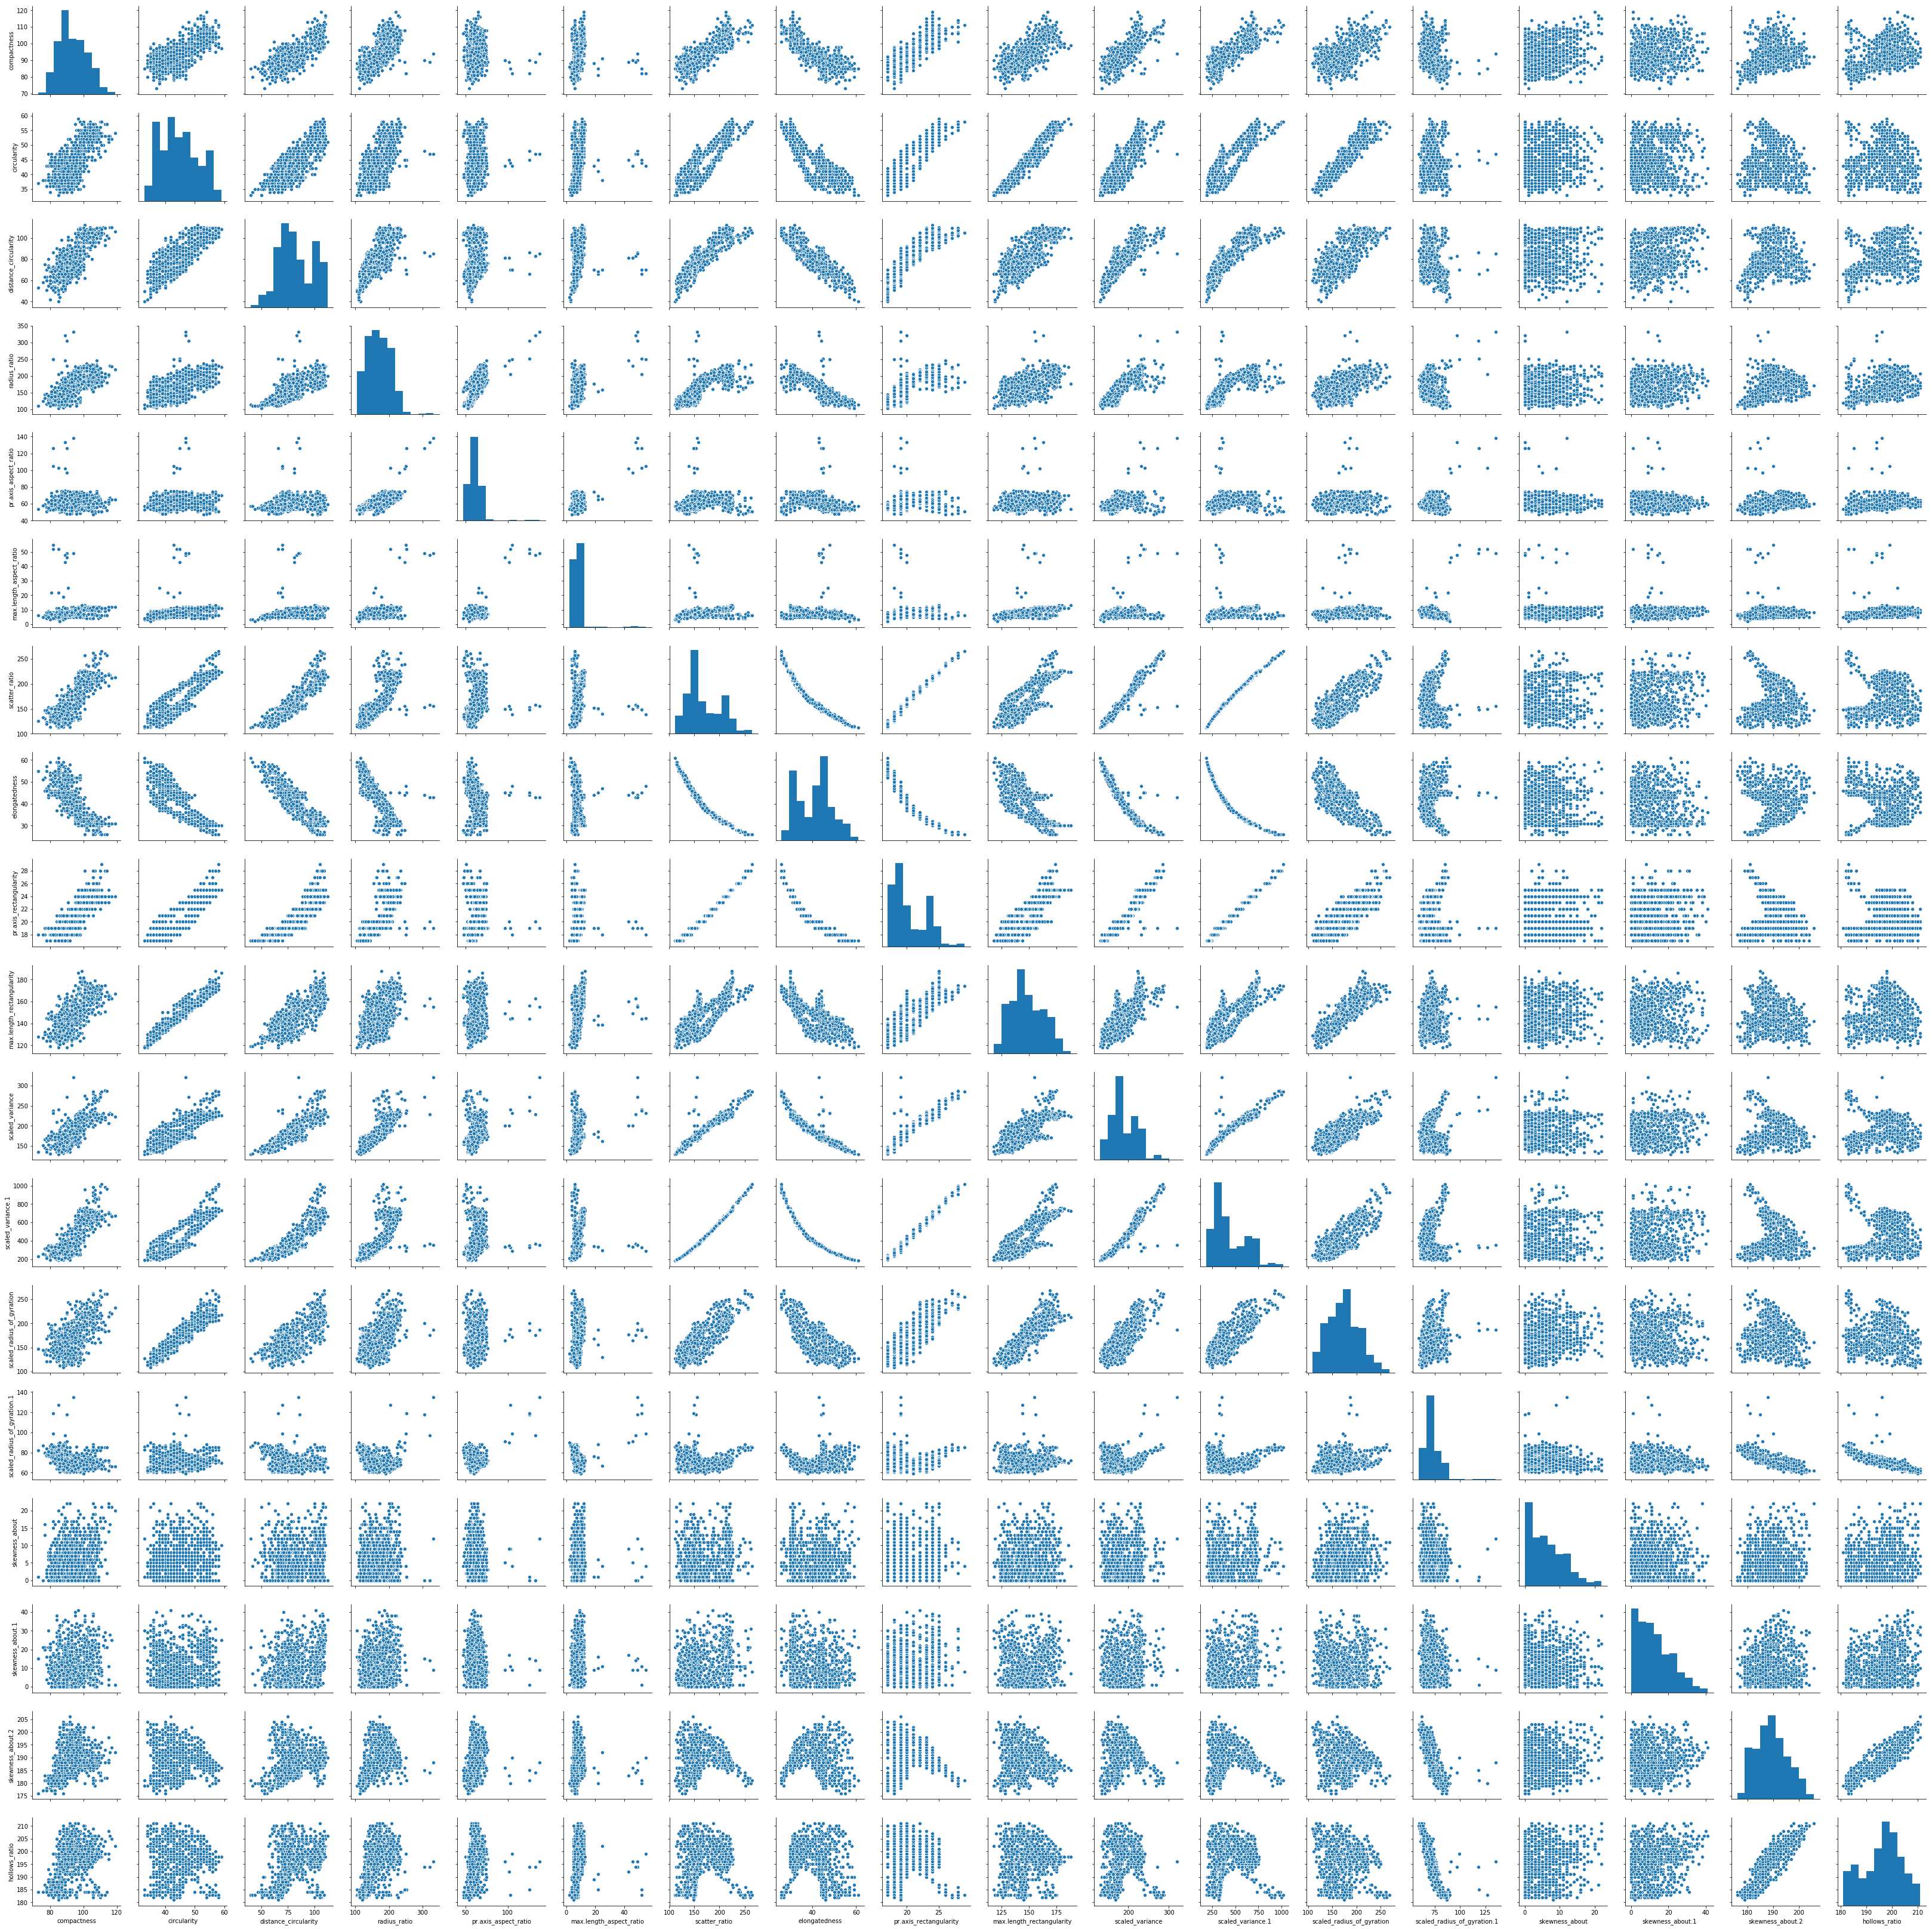

In [27]:
sns.pairplot(df)

In [29]:
df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.689885,0.789955,0.688130,0.090557,0.150369,0.814026,-0.788051,0.814227,0.674902,0.764386,0.820240,0.581405,-0.258437,0.231648,0.168384,0.296195,0.372806
circularity,0.689885,1.000000,0.797704,0.623950,0.155023,0.251619,0.858149,-0.825108,0.856137,0.965366,0.806108,0.850932,0.935594,0.049070,0.141726,-0.001975,-0.113902,0.049331
distance_circularity,0.789955,0.797704,1.000000,0.771404,0.163386,0.265591,0.909023,-0.912713,0.897261,0.773459,0.865683,0.891789,0.705689,-0.238145,0.110280,0.277851,0.145258,0.343228
radius_ratio,0.688130,0.623950,0.771404,1.000000,0.667375,0.452460,0.743470,-0.795761,0.716210,0.570478,0.806788,0.731773,0.544636,-0.175348,0.044693,0.178079,0.375591,0.470895
pr.axis_aspect_ratio,0.090557,0.155023,0.163386,0.667375,1.000000,0.652093,0.113696,-0.191193,0.086992,0.133553,0.290375,0.100668,0.135663,0.173060,-0.059244,-0.040769,0.229702,0.257566
max.length_aspect_ratio,0.150369,0.251619,0.265591,0.452460,0.652093,1.000000,0.171445,-0.183242,0.167514,0.309180,0.331124,0.150069,0.197179,0.308329,0.016461,0.041210,-0.030543,0.139283
scatter_ratio,0.814026,0.858149,0.909023,0.743470,0.113696,0.171445,1.000000,-0.973413,0.991992,0.808154,0.950067,0.996396,0.795748,-0.045632,0.070118,0.227375,0.009967,0.138424
elongatedness,-0.788051,-0.825108,-0.912713,-0.795761,-0.191193,-0.183242,-0.973413,1.000000,-0.950345,-0.771099,-0.937846,-0.956858,-0.761563,0.119750,-0.046621,-0.201325,-0.117568,-0.233408
pr.axis_rectangularity,0.814227,0.856137,0.897261,0.716210,0.086992,0.167514,0.991992,-0.950345,1.000000,0.811979,0.935653,0.992119,0.792895,-0.033769,0.078701,0.231171,-0.017383,0.117202
max.length_rectangularity,0.674902,0.965366,0.773459,0.570478,0.133553,0.309180,0.808154,-0.771099,0.811979,1.000000,0.744760,0.796230,0.865240,0.031098,0.130356,0.013045,-0.108019,0.086792


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - sm.OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

In [39]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [42]:
df_tmp = vehicle_df.copy()
df_tmp = df_tmp.drop('class', axis=1)
variance_inflation_factors(df_tmp)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                          63727.966381
compactness                        5.470938
circularity                       51.585221
distance_circularity              14.332026
radius_ratio                      39.559625
pr.axis_aspect_ratio              16.932116
max.length_aspect_ratio            4.224687
scatter_ratio                   1762.037845
elongatedness                    153.273729
pr.axis_rectangularity            91.081612
max.length_rectangularity         27.110997
scaled_variance                   45.803438
scaled_variance.1                905.652804
scaled_radius_of_gyration         13.333240
scaled_radius_of_gyration.1       12.134120
skewness_about                     1.347383
skewness_about.1                   1.673831
skewness_about.2                  16.564578
hollows_ratio                     16.510613
Name: VIF, dtype: float64

### 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance) - 20 points


### 4. Use Support vector machines to classify the class(y) of vehicles and find the difference of accuracy with and without PCA on predictors(X). 20 points

### 5. Optional - Use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy